which languages are most used and most sought after by developers?

What are the main differences between female and male developers?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
%matplotlib inline

df = pd.read_csv('./survey_results_public.csv')
df.head()

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,...,Strongly disagree,Male,High school,White or of European descent,Strongly disagree,Strongly agree,Disagree,Strongly agree,NaN,NaN
1,2,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,...,Strongly disagree,Male,A master's degree,White or of European descent,Somewhat agree,Somewhat agree,Disagree,Strongly agree,NaN,37500.0
2,3,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A professional degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,113750.0,NaN
3,4,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Doctoral degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A doctoral degree,White or of European descent,Agree,Agree,Somewhat agree,Strongly agree,NaN,NaN
4,5,Professional developer,"Yes, I program as a hobby",Switzerland,No,Employed full-time,Master's degree,Computer science or software engineering,Never,10 to 19 employees,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
columns_of_interest = [
    'Professional',
    'Country',
    'University',
    'EmploymentStatus',
    'DeveloperType',
    'HaveWorkedLanguage',
    'WantWorkLanguage',
    'Gender',
    'Salary'
]

sub_df = df.loc[:, columns_of_interest] 

In [4]:
sub_df.head()

,Professional,Country,University,EmploymentStatus,DeveloperType,HaveWorkedLanguage,WantWorkLanguage,Gender,Salary
0,Student,United States,No,"Not employed, and not looking for work",NaN,Swift,Swift,Male,NaN
1,Student,United Kingdom,"Yes, full-time",Employed part-time,NaN,JavaScript; Python; Ruby; SQL,Java; Python; Ruby; SQL,Male,NaN
2,Professional developer,United Kingdom,No,Employed full-time,Other,Java; PHP; Python,C; Python; Rust,Male,113750.0
3,Professional non-developer who sometimes write...,United States,No,Employed full-time,NaN,Matlab; Python; R; SQL,Matlab; Python; R; SQL,Male,NaN
4,Professional developer,Switzerland,No,Employed full-time,Mobile developer; Graphics programming; Deskto...,NaN,NaN,NaN,NaN


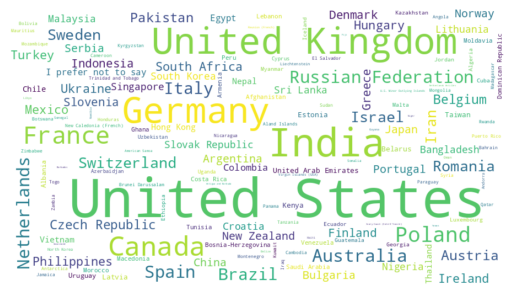

In [16]:
countries = sub_df.groupby('Country').size().to_dict()
wordcloud = WordCloud(width=900,height=500, background_color='white').generate_from_frequencies(countries)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [117]:
sub_gen_dev_df = sub_df.dropna(subset=['Gender', 'DeveloperType'])


In [118]:
sub_gen_dev_df

,Professional,Country,University,EmploymentStatus,DeveloperType,HaveWorkedLanguage,WantWorkLanguage,Gender,Salary
2,Professional developer,United Kingdom,No,Employed full-time,Other,Java; PHP; Python,C; Python; Rust,Male,113750.0
7,Professional developer,Poland,No,Employed full-time,Web developer,CoffeeScript; Clojure; Elixir; Erlang; Haskell...,Clojure; Elixir; Haskell; Scala,Male,NaN
8,Professional developer,Colombia,"Yes, part-time",Employed full-time,Web developer; Mobile developer,C#; JavaScript,F#; Go,Male,NaN
9,Professional developer,France,"Yes, full-time","Independent contractor, freelancer, or self-em...",Mobile developer; Desktop applications developer,Objective-C; Swift,C#; Java; Objective-C; Swift,Male,NaN
13,Professional developer,Germany,No,Employed full-time,Web developer,Java; JavaScript; Ruby; SQL,JavaScript; Ruby; Rust; Swift,Female,NaN
...,...,...,...,...,...,...,...,...,...
51383,Professional developer,Sweden,No,"Independent contractor, freelancer, or self-em...",Web developer; Mobile developer; Desktop appli...,JavaScript; Objective-C; PHP; SQL; Swift,NaN,Male,NaN
51384,Professional developer,United States,No,Employed full-time,Web developer,JavaScript,C#; JavaScript; VB.NET,Male,NaN
51386,Professional developer,Romania,No,Employed full-time,Web developer; Mobile developer; Developer wit...,C++; C#; Java; JavaScript; PHP; SQL,C++; C#; Go; Java; JavaScript; PHP,Male,NaN
51387,Professional developer,United States,No,Employed full-time,Web developer; Developer with a statistics or ...,C#; JavaScript; Python; SQL; VB.NET; VBA,C#; Python; R; Ruby; Rust; Scala; TypeScript; ...,Male,58000.0


In [92]:
def get_unique_group_type(df, column):
    return df[column].str.split('; ').explode('index').value_counts().index.to_list()

In [138]:
def get_count_group_type(df, column, groups):
    group_count = dict()
    for group in groups:
        group_count[group] = df[column].apply(lambda s: group in s.split(';')).sum()
    return group_count

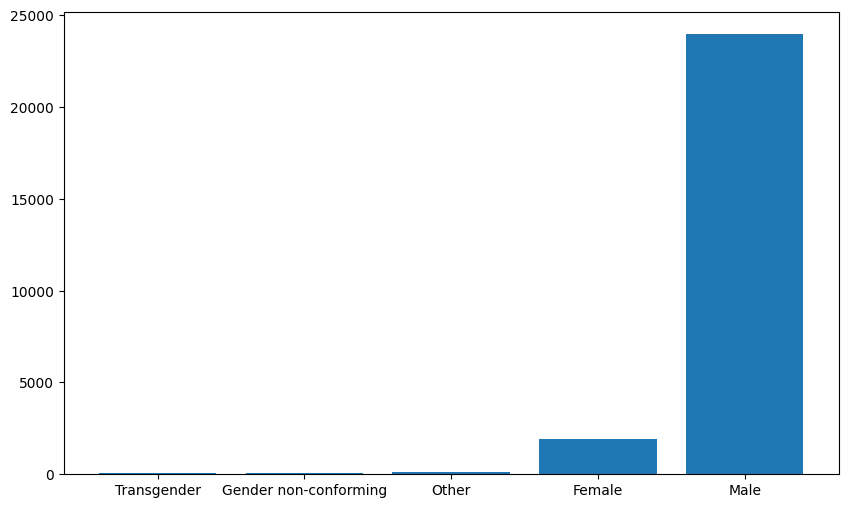

In [151]:
unique_genders = get_unique_group_type(sub_gen_dev_df, 'Gender')
genders = get_count_group_type(sub_gen_dev_df, 'Gender', unique_genders)

plt.figure(figsize=(10,6))
plt.bar(*zip(*sorted(genders.items(), key=lambda x:x[1])))
plt.show()

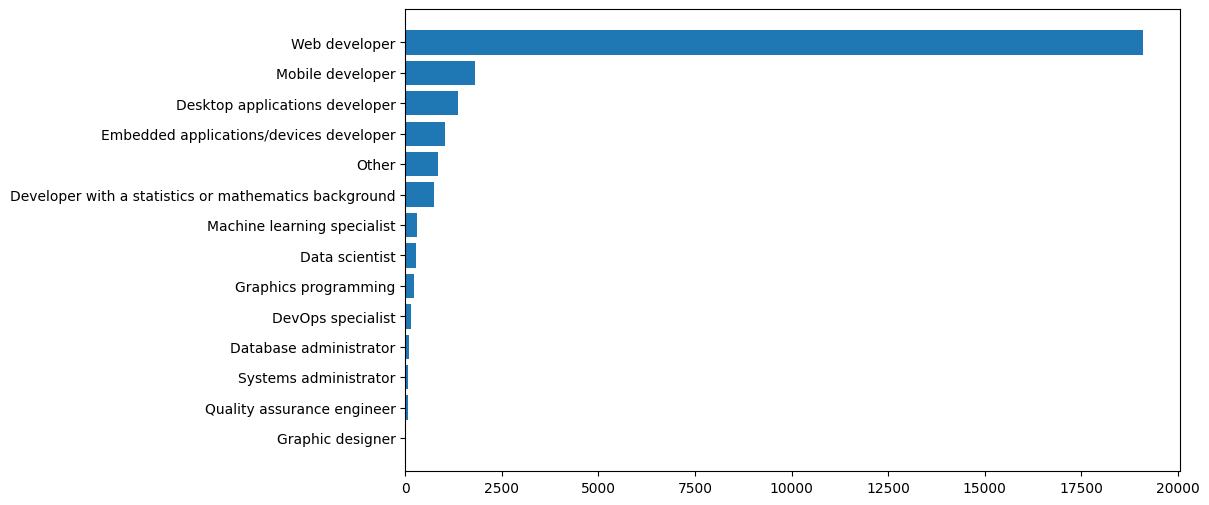

In [152]:
unique_developer_types = get_unique_group_type(sub_gen_dev_df, 'DeveloperType')
developer_types = get_count_group_type(sub_gen_dev_df, 'DeveloperType', unique_developer_types)

plt.figure(figsize=(10,6))
plt.barh(*zip(*sorted(developer_types.items(), key=lambda x:x[1])))
plt.show()

In [ ]:
def get_filter_group_type(df, filters):
    group_filters = dict()
    for column, value in filters.items():
        group_filters[group] = df[column].apply(lambda s: group in s.split(';')).sum()
    return group_filters

In [155]:
ress= sub_gen_dev_df['Gender'].apply(lambda s: 'Male' in s.split(';'))

In [156]:
ress

2         True
7         True
8         True
9         True
13       False
         ...  
51383     True
51384     True
51386     True
51387     True
51390     True
Name: Gender, Length: 26114, dtype: bool

In [ ]:
developer_type_by_gender = dict()
for unique_gender in unique_genders:
    for unique_developer_type in unique_developer_types:
        group_count[group] = df['Gender'].apply(lambda s: unique_gender in s.split(';'))  \
                                         .apply(lambda s: unique_developer_types in s.split(';')).sum()
        
    
    